In [3]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

%matplotlib inline

In [14]:
# reading the image
image = io.imread('goldentemple.jpg')

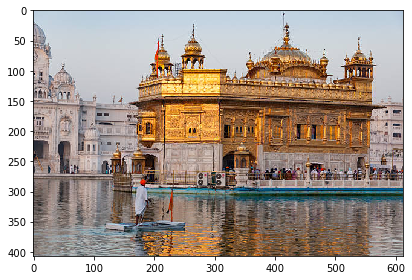

In [15]:
io.imshow(image);

In [16]:
image.shape

(407, 612, 3)

In [17]:
# preprocessing
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

In [18]:
print(image.shape)
print(image[:5])

(249084, 3)
[[189 206 222]
 [189 206 222]
 [189 206 222]
 [189 206 222]
 [189 206 222]]


In [19]:
# modelling

kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

KMeans(n_clusters=16)

In [29]:
# centers

centers = np.asarray(kMeans.cluster_centers_,)
centers

array([[201.04885724, 209.25049879, 217.22944411],
       [145.18360261, 101.46067177,  67.34098639],
       [167.08475729, 154.01258182, 150.67134234],
       [ 80.92635727,  46.05245184,  24.73117338],
       [185.29385241, 135.14439679,  90.88232706],
       [ 31.5824359 ,  19.3775641 ,  14.33910256],
       [191.1929998 , 177.65577417, 174.81654143],
       [232.60462056, 157.72335137,  59.50957742],
       [ 28.81933333,  95.475     , 121.38833333],
       [247.56327597, 202.38989327, 112.98802004],
       [144.10386957, 131.45271454, 127.4372863 ],
       [ 45.66016353,  56.2930713 ,  58.89169416],
       [124.38035714,  74.47653061,  35.33732993],
       [ 96.54294258,  81.17111244,  73.1479067 ],
       [185.81992032, 107.5187251 ,  32.4698008 ],
       [117.58902358, 108.59020741, 105.81764372]])

In [33]:
# labels 

labels = np.asarray(kMeans.labels_)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(249084,)
(407, 612)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [15, 15, 15, ..., 10, 10, 10],
       [15, 15, 10, ...,  2,  2,  2],
       [10,  2,  2, ...,  6,  6,  6]])

In [31]:
#reconstruction

newImage = np.zeros((rows, cols, 3))
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('new.png', newImage);

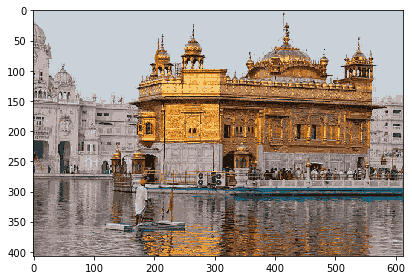

In [32]:
io.imshow(newImage)